# Sample code for Question 1

This notebook shows how you can use the provided Python function to pull player stats from an online website.
This function lives in a custom package that is provided to you in this repository.
You are encouraged to leverage this package as a skeleton and add all of your reusable code, functions, etc. into relevant modules.
This makes collaboration much easier as the package could be seen as a "single source of truth" to pull data, create visualizations, etc. rather than relying on a jumble of notebooks.
You can still run into trouble if branches are not frequently merged as work progresses, so try to not let your branches diverge too much.

In [39]:
import pandas as pd

from ift6758.data import get_player_stats

If the above doesn't work for you, make sure you've installed the repo as specified in the readme file. 
Essentially you must make sure that your environment is setup (either through conda or virtualenv), and then install it using:

```bash
pip install -e /path/to/repo 
```

The nice thing using this approach is if you have your environment activated, you can import modules from anywhere on your system!

In [40]:
df = get_player_stats(2017, 'goalies')

Retrieving data from 'https://www.hockey-reference.com/leagues/NHL_2017_goalies.html'...


If you're curious, this function uses the `pd.read_html()` method ([doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)), which internally uses [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to parse HTML data.

In [41]:
df.head()

,Rk,Player,Age,Tm,GP,GS,W,L,T/O,GA,...,MIN,QS,QS%,RBS,GA%-,GSAA,G,A,PTS,PIM
0,1,Jake Allen,26,STL,61,60,33,20,5,138,...,3418,33,.550,11,98,2.20,0,1,1,4
1,2,Jorge Alves,38,CAR,1,0,0,0,0,0,...,0,0,NaN,0,NaN,NaN,0,0,0,0
2,3,Frederik Andersen,27,TOR,66,66,33,16,14,169,...,3799,38,.576,11,95,8.58,0,1,1,16
3,4,Craig Anderson,35,OTT,40,40,25,11,4,92,...,2421,25,.625,4,85,15.92,0,1,1,0
4,5,Richard Bachman,29,VAN,5,5,2,3,0,13,...,295,2,.400,0,NaN,NaN,0,0,0,0


In [42]:
pd.set_option("max_rows", None)  # Affiche toute les lignes

df["SV%"] = pd.to_numeric(df["SV%"], errors='coerce').fillna(0)  # formate la colonne %SV en numérique et remplis les NaN par des 0
sortedGoalie = df.sort_values(by="SV%", ascending=False)

print(sortedGoalie[["Player", "W", "SV%"]])



                  Player   W    SV%
85       Dustin Tokarski   0  1.000
11         Jack Campbell   0  1.000
63      Alex Nedeljkovic   0  1.000
29   Kristers Gudlevskis   0  1.000
26           Jon Gillies   1  0.964
51      Charlie Lindgren   2  0.949
81          Alex Stalock   1  0.944
9       Sergei Bobrovsky  41  0.931
17            Aaron Dell  11  0.931
33       Magnus Hellberg   1  0.929
82       Anthony Stolarz   2  0.928
10      Laurent Brossoit   4  0.928
36          Jimmy Howard  10  0.927
8         Antoine Bibeau   1  0.927
3         Craig Anderson  25  0.926
28      Philipp Grubauer  13  0.926
35         Braden Holtby  42  0.925
25           John Gibson  25  0.924
16         Scott Darling  18  0.924
70           Carey Price  37  0.923
20          Devan Dubnyk  40  0.923
77           Juuse Saros  10  0.923
66        Anders Nilsson  10  0.923
62           Matt Murray  32  0.923
72          Antti Raanta  16  0.922
48          Robin Lehner  23  0.920
74          James Reimer  18

Student : Un problème apparait clairement puisqu'on ne prends pas en compte les victoires des goal.
On devrait trier les goals par victoire puis par SV%.

Question 2:

In [43]:
df["W"] = pd.to_numeric(df["W"], errors='coerce')
reSortedGoalie = df.sort_values(by=["W", "SV%"], ascending=False)

print(reSortedGoalie[["Player", "W", "SV%"]])

                  Player   W    SV%
35         Braden Holtby  42  0.925
84            Cam Talbot  42  0.919
9       Sergei Bobrovsky  41  0.931
20          Devan Dubnyk  40  0.923
70           Carey Price  37  0.923
73           Tuukka Rask  37  0.915
41          Martin Jones  35  0.912
2      Frederik Andersen  33  0.918
0             Jake Allen  33  0.915
62           Matt Murray  32  0.923
15        Corey Crawford  32  0.918
75           Pekka Rinne  31  0.918
52      Henrik Lundqvist  31  0.910
92           Peter Budaj  30  0.915
27         Thomas Greiss  26  0.913
21         Brian Elliott  26  0.910
56           Steve Mason  26  0.908
34     Connor Hellebuyck  26  0.907
89              Cam Ward  26  0.905
3         Craig Anderson  25  0.926
25           John Gibson  25  0.924
48          Robin Lehner  23  0.920
88    Andrei Vasilevskiy  23  0.917
49         Kari Lehtonen  22  0.902
5       Jonathan Bernier  21  0.915
78        Cory Schneider  20  0.908
80            Mike Smith  19

Graphique

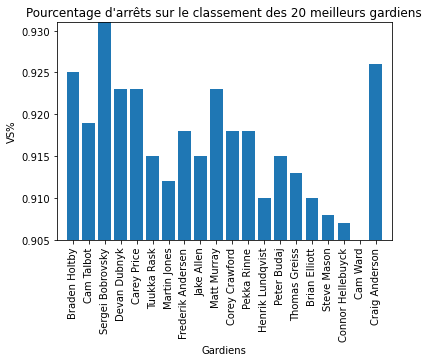

In [44]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
histo = plt.bar(x, height=reSortedGoalie["SV%"][:20])
plt.xticks(x, reSortedGoalie["Player"][:20], rotation=90)
plt.axis([-1, 20, min(reSortedGoalie["SV%"][:20]), max(reSortedGoalie["SV%"][:20])])
plt.title("Pourcentage d'arrêts sur le classement des 20 meilleurs gardiens")
plt.xlabel("Gardiens")
plt.ylabel("VS%")
plt.show()
